,PlayTennis,Outlook,Temperature,Humidity,Wind
0,Yes,Rain,Cool,Normal,Weak
1,No,Rain,Mild,High,Strong


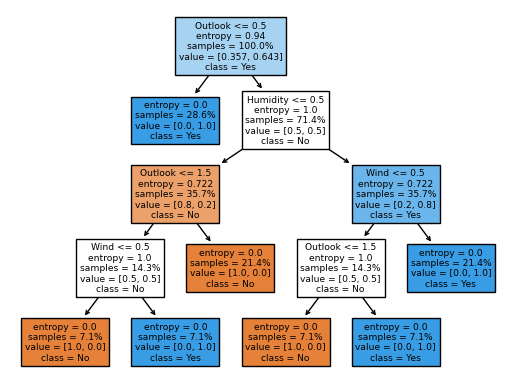

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

# Train set
train_data = pd.read_csv('playtennis.csv')
X_train = train_data.drop('PlayTennis', axis=1)
y_train = train_data['PlayTennis']

# Convert categorical features to numerical values
label_encoders = {}
for column in X_train.columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])

# Convert categorical target variable to numerical values
label_encoder_target = LabelEncoder()
y_train = label_encoder_target.fit_transform(y_train)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Test set
test_data = pd.read_csv('playtennis_test.csv')
X_test = test_data.drop('PlayTennis', axis=1)

# Convert categorical features to numerical values using the same label encoders from training
for column in X_test.columns:
    X_test[column] = label_encoders[column].transform(X_test[column])

# Optional: Visualize or plot the decision tree
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=['No', 'Yes'],
          filled=True, # Adds color according to class
          proportion=True);

# Classify the new samples in the test set
y_pred = clf.predict(X_test)

# Convert numerical predictions back to categorical values
y_pred_decode = label_encoder_target.inverse_transform(y_pred)

# Create a DataFrame to display the test set with predicted values
pred_data = test_data.copy()
pred_data['PlayTennis'] = y_pred_decode

# Display the test set with predicted values
pred_data